<a href="https://colab.research.google.com/github/Nhat-Thanh/CS523.L21/blob/main/External_sort/External_sort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# show hardware information
!sudo inxi --cpu --graphics --machine --memory --system --disk --color=32

In [ ]:
# hwinfo.txt is the file that I used to save my computer hardware information and uploaded to my drive.
!cat /content/drive/MyDrive/External_Sort/hwinfo.txt

System:    Host: thanh-Inspiron-3580 Kernel: 5.8.0-48-generic x86_64 bits: 64 Desktop: Gnome 3.36.7 
           Distro: Ubuntu 20.04.2 LTS (Focal Fossa) 
Machine:   Type: Laptop System: Dell product: Inspiron 3580 v: N/A serial: 5LBKDX2 
           Mobo: Dell model: 02G1KD v: A00 serial: /5LBKDX2/CNCMC0096N03CE/ UEFI: Dell v: 1.12.0 date: 10/28/2020 
Memory:    RAM: total: 7.63 GiB used: 1.91 GiB (25.0%) 
           Array-1: capacity: 32 GiB slots: 2 EC: None 
           Device-1: DIMM A size: 4 GiB speed: 2667 MT/s 
           Device-2: DIMM B size: 4 GiB speed: 2667 MT/s 
CPU:       Topology: Quad Core model: Intel Core i5-8265U bits: 64 type: MT MCP L2 cache: 6144 KiB 
           Speed: 3772 MHz min/max: 400/3900 MHz Core speeds (MHz): 1: 3703 2: 3700 3: 3700 4: 3701 5: 3720 6: 3700 7: 3704 
           8: 3720 
Graphics:  Device-1: Intel UHD Graphics 620 driver: i915 v: kernel 
           Device-2: AMD Jet PRO [Radeon R5 M230 / R7 M260DX / Radeon 520 Mobile] driver: radeon v: kernel

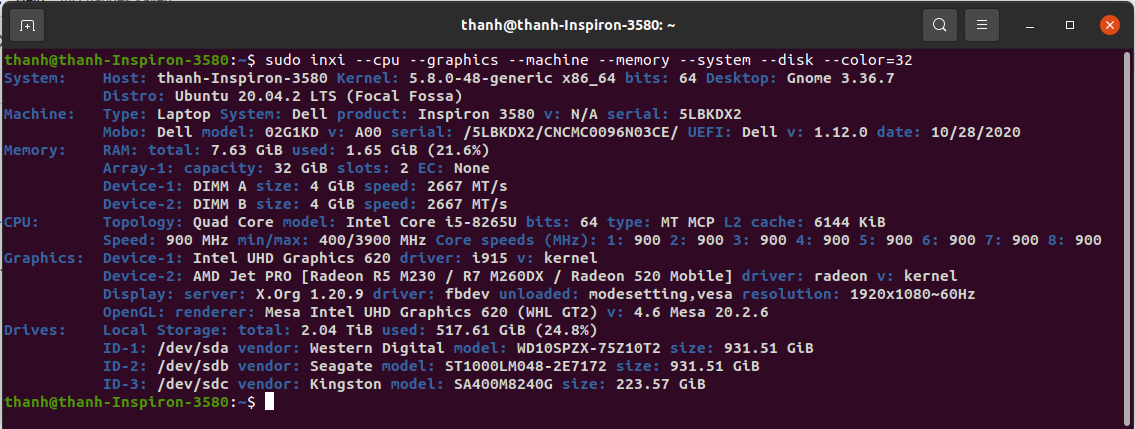

***Thông số ổ cứng được sử dụng để kiểm nghiệm***

- Tên ổ cứng: Western Digital Blue WD10SPZX 2.5 inch
- Chuẩn kết nối: SATA 3 (6Gb/s).
- Dung lượng lưu trữ: 1TB (1000GB)
- Hiệu năng
  + Tốc độ đọc: ~100 MB/s
  + Tốc độ ghi: ~100 MB/s
  + Tốc độ chuẩn kết nối: 6 Gb/s
  + Tốc độ vòng quay: 5400 RPM
  + Bộ nhớ đệm: 128 MB
- Thư mục lưu file tạm trong lúc sort là /media/thanh/DATA/tmp 
- Thư mục tạm, file input, output, và file đo thời gian đều cùng nằm trên 1 ổ.


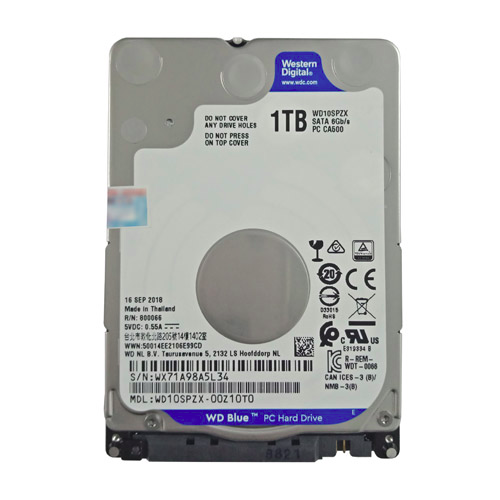

In [ ]:
# Command to build and run main.cpp file on my computer.
!g++ main.cpp -pthread -o main && ./main

In [ ]:
# Create a file to summary the content of main.cpp file
!touch /content/drive/MyDrive/External_Sort/main_summary.cpp

In [ ]:
%%writefile /content/drive/MyDrive/External_Sort/main_summary.cpp

// #summary content of cpp file which used for creating input files on my computer

#include <fstream>
#include <time.h>
#include <string>

void write_file(int64_t& n)
{
  n *= 1000000;
  // #path to input folder on my computer
  std::string path_file = "/media/thanh/DATA/External_sort/input_complexity/input_" + std::to_string(n) + "_trieu.txt";
	std::ofstream file;
	file.open(path_file);
	for (int i = 0; i < n; ++i)
	{
		int x = rand() % 2000000000;
		file << x << "\n";
	}
	file.close();
}

int main() {
	srand(time(0));

  // #create input files for measuring complexity, file 4 billion is not included in input files for measuring complexity
  int64_t arr [] = {3, 7, 10, 14, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100,\
                    150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 4000};
  for (int i = 0; i < 39; ++i) {
      write_file(arr[i]);
  }
  // #finish creating input files

  // #create file 4 billion
  write_file(arr[39]);

	return 0;
}

Overwriting /content/drive/MyDrive/External_Sort/main_summary.cpp


In [ ]:
# sort file 4 billion on my computer
!/usr/bin/time -v -o ./time_output/complexity/Test_4000_trieu/time_output_4000_trieu sort -n ./input/input_4000_trieu.txt -o ./output/output_4000_trieu.txt

Để tạo sự tiện lợi cho quá trình thử nghiệm, thay vì phải gõ lai từng lệnh vào terminal dài dòng, em viết 2 file là ***sort.sh*** và ***measure_ram.sh***.
- File ***sort.sh*** có nhiệm vụ sắp xếp file input và đồng thời chạy các lệnh trong file ***measure_ram.sh*** để đo các thông số cần thiết trong lúc sắp xếp, nó nhận các đối số là ***INDEX***, ***CORE_NUMBER***, ***BUFFER***, ***TEST_CONTENT***.
	+ ***INDEX***: là kích thước ứng với file input, vd: ***INDEX*** = 1000 -> nhận file có input là 1000 triệu (1 tỷ) số nguyên.
	+ ***CORE_NUMBER***: là số nhân CPU muốn dùng để sắp xếp file input.
	+ ***BUFFER***: là dung lượng buffer muốn dùng để sắp xếp file input.
	+ ***TEST_CONTENT***: dùng để xác định nội dung mình muốn kiểm thử và lưu file kết quả vào các đường dẫn khác nhau, có 3 giá trị có thể truyền là ***complexity*** (test độ phức tạp), ***buffer*** (test buffer tăng dần), ***parallel*** (test cpu core tăng dần)
	
- File ***measure_ram.sh*** dùng để đo các thông số của phần cứng khi thực thi lệnh ***sort*** (không phải ***sort.sh***), nó nhận các đối số là ***INDEX***, ***CORE_NUMBER***, ***BUFFER***, ***TEST_CONTENT***
	+ ***INDEX***: là kích thước ứng với file input, vd: ***INDEX*** = 500 -> nhận file có input là 500 triệu số nguyên.
	+ ***CORE_NUMBER***: là số nhân CPU muốn dùng để sắp xếp file input.
	+ ***BUFFER***: là dung lượng buffer muốn dùng để sắp xếp file input.
	+ ***TEST_CONTENT***: dùng để xác định nội dung mình muốn kiểm thử và lưu file kết quả vào các đường dẫn khác nhau, có 3 giá trị có thể truyền là ***complexity*** (test độ phức tạp với input tăng dần), ***buffer*** (test buffer tăng dần), ***parallel*** (test với số nhân CPU tăng dần)
	
Các file trên cũng chỉ có thể sắp xếp và đo thông số cho 1 file input duy nhất, em viết thêm các file là ***measure_buffer.sh***, ***measure_complexity.sh***, ***measure_parallel.sh***.
  + ***measure_complexity.sh***: file này dùng để đo độ phức tạp bằng cách gọi file ***sort.sh*** nhiều lần, file này không nhận đối số.
  + ***measure_buffer.sh***: file này dùng để đo thời gian thực thi của file input có 500 triệu số khi chạy lệnh sort với các buffer khác nhau, file này không nhận đối số.
  + ***meausure_parallel.sh***: file này dùng để đo thời gian thực thi của file input có 500 triệu số nguyên khi chạy lệnh sort với buffer cố định và số nhân CPU tăng dần sau các lần test, file này không nhận đối số.

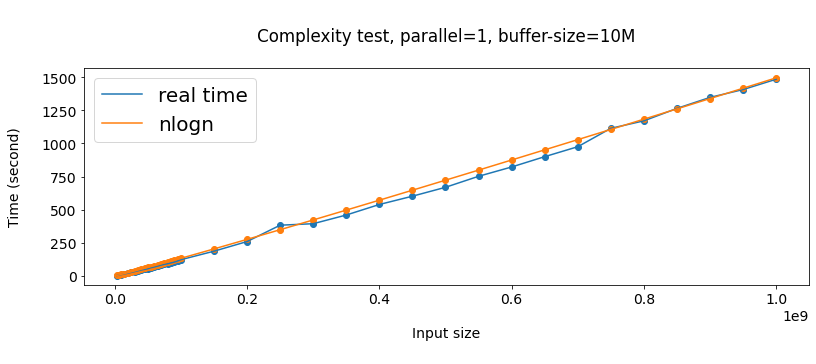

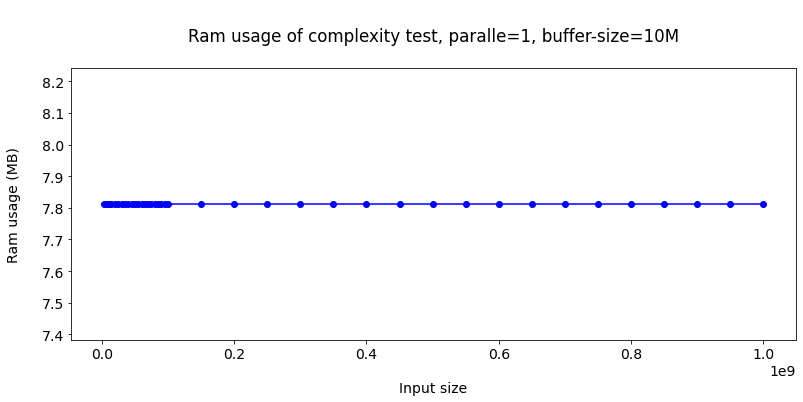

In [ ]:
# Visualize the complexity result
from matplotlib import pyplot as plt
from matplotlib import rc
import pandas as pd
import numpy as np
import math
import sys

data = pd.read_csv("/content/drive/MyDrive/External_Sort/GNU_sort_complexity.csv").values
N = data[:, 0].reshape(-1, 1)
Time = data[:, 1].reshape(-1, 1)
ram_percent = data[:, 4].reshape(-1, 1)
ram_usage = []
nlogn = []
i = 0

while i < len(N):
  # chia 20000000 de tranh viec tran so
  nlogn.append(N[i] * math.log(N[i], 2) / 20000000)
  ram_usage.append(7.63 * 1024 * ram_percent[i] / 100)
  i += 1

font = {'size': 14}
rc('font', **font)

# Complexity test, parallel=1, buffer-size=10M
plt.figure(figsize=(13, 4))
plt.plot(N, Time, label="real time")
plt.plot(N, nlogn, label="nlogn")
plt.scatter(N, Time)
plt.scatter(N, nlogn)
plt.title("\nComplexity test, parallel=1, buffer-size=10M\n")
plt.xlabel("\nInput size\n")
plt.ylabel("Time (second)\n")
plt.legend(prop={"size": 20})
plt.show()

# Ram usage of complexity test, paralle=1, buffer-size=10M
plt.figure(figsize=(13, 5))
plt.plot(N, ram_usage, color="blue")
plt.scatter(N, ram_usage, color="blue")
plt.title("\nRam usage of complexity test, paralle=1, buffer-size=10M\n")
plt.xlabel("\nInput size")
plt.ylabel("Ram usage (MB)\n")
plt.show()

Buffer: 20 (MB) - Ram usage: 23 (MB) - Time: 594.94 (s)
Buffer: 60 (MB) - Ram usage: 62 (MB) - Time: 598.97 (s)
Buffer: 100 (MB) - Ram usage: 101 (MB) - Time: 567.89 (s)
Buffer: 150 (MB) - Ram usage: 140 (MB) - Time: 569.96 (s)
Buffer: 200 (MB) - Ram usage: 195 (MB) - Time: 547.27 (s)
Buffer: 250 (MB) - Ram usage: 250 (MB) - Time: 572.74 (s)
Buffer: 300 (MB) - Ram usage: 289 (MB) - Time: 555.09 (s)
Buffer: 350 (MB) - Ram usage: 351 (MB) - Time: 533.91 (s)
Buffer: 400 (MB) - Ram usage: 398 (MB) - Time: 547.69 (s)
Buffer: 450 (MB) - Ram usage: 445 (MB) - Time: 535.88 (s)
Buffer: 500 (MB) - Ram usage: 500 (MB) - Time: 543.28 (s)
Buffer: 550 (MB) - Ram usage: 546 (MB) - Time: 548.19 (s)
Buffer: 600 (MB) - Ram usage: 601 (MB) - Time: 543.07 (s)
Buffer: 650 (MB) - Ram usage: 617 (MB) - Time: 550.02 (s)
Buffer: 700 (MB) - Ram usage: 695 (MB) - Time: 549.36 (s)
Buffer: 750 (MB) - Ram usage: 750 (MB) - Time: 544.71 (s)
Buffer: 800 (MB) - Ram usage: 796 (MB) - Time: 531.77 (s)
Buffer: 850 (MB) -

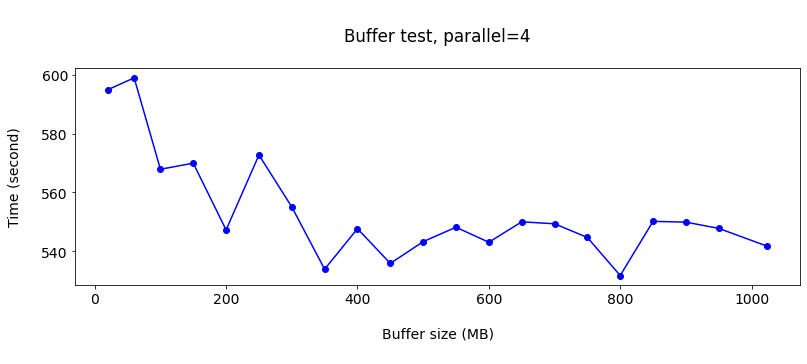

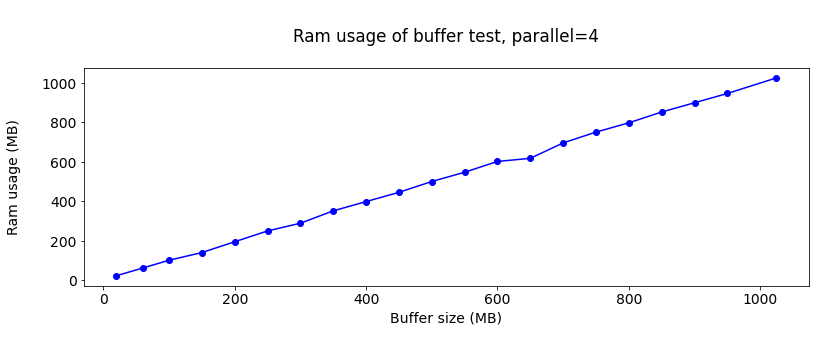

In [ ]:
# Visualize the complexity result
data = pd.read_csv("/content/drive/MyDrive/External_Sort/GNU_sort_buffer.csv").values
buffer_size = data[:, 0].reshape(-1, 1)
Time = data[:, 1].reshape(-1, 1)
ram_percent = data[:, 4].reshape(-1, 1)
ram_usage = []
i = 0

while i < len(buffer_size):
  ram_usage.append(7.63 * 1024 * ram_percent[i] / 100)
  sys.stdout.write("Buffer: {0} (MB) - Ram usage: {1} (MB) - Time: {2} (s)\n".format(int(buffer_size[i]), int(ram_usage[i]), float(Time[i])))
  i += 1

# Buffer test, parallel=4
plt.figure(figsize=(13, 4))
plt.plot(buffer_size, Time, color="blue")
plt.scatter(buffer_size, Time, color="blue")
plt.title("\nBuffer test, parallel=4\n")
plt.xlabel("\nBuffer size (MB)\n")
plt.ylabel("Time (second)\n")
plt.show()

# Ram usage of buffer test, parallel=4
plt.figure(figsize=(13, 4))
plt.plot(buffer_size, ram_usage, color="blue")
plt.scatter(buffer_size, ram_usage, color="blue")
plt.title("\nRam usage of buffer test, parallel=4\n")
plt.xlabel("Buffer size (MB)\n")
plt.ylabel("Ram usage (MB)\n")
plt.show()

Thread: 1 - Ram: 101 MB - Time: 791.11 (s)
Thread: 2 - Ram: 101 MB - Time: 647.83 (s)
Thread: 3 - Ram: 101 MB - Time: 614.04 (s)
Thread: 4 - Ram: 101 MB - Time: 568.01 (s)
Thread: 5 - Ram: 101 MB - Time: 591.87 (s)
Thread: 6 - Ram: 101 MB - Time: 602.28 (s)
Thread: 7 - Ram: 101 MB - Time: 593.97 (s)
Thread: 8 - Ram: 101 MB - Time: 616.23 (s)


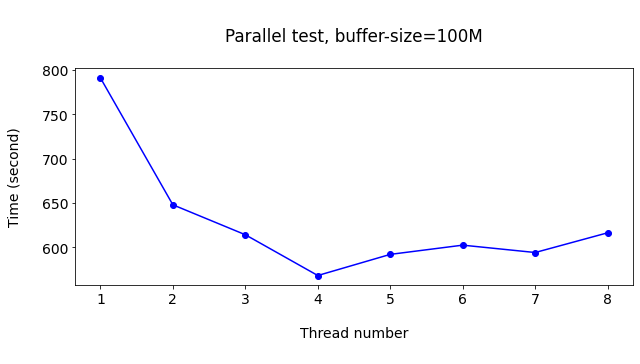

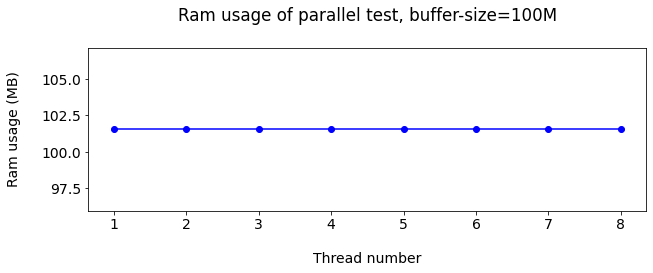

In [ ]:
# Visualize the complexity result
data = pd.read_csv("/content/drive/MyDrive/External_Sort/GNU_sort_parallel.csv").values
CPU_threads = data[:, 0].reshape(-1, 1)
Time = data[:, 1].reshape(-1, 1)
ram_percent = data[:, 4].reshape(-1, 1)
ram_usage = []
i = 0

while i < len(CPU_threads):
  ram_usage.append(7.63 * 1024 * ram_percent[i] / 100)
  sys.stdout.write("Thread: {0} - Ram: {1} MB - Time: {2} (s)\n".format(int(CPU_threads[i]), int(ram_usage[i]), float(Time[i])))
  i += 1
  
# Parallel test, buffer-size=100M
plt.figure(figsize=(10, 4))
plt.plot(CPU_threads, Time, color="blue")
plt.scatter(CPU_threads, Time, color="blue")
plt.title("\nParallel test, buffer-size=100M\n")
plt.xlabel("\nThread number\n")
plt.ylabel("Time (second)\n")
plt.show()

# Ram usage of parallel test, buffer-size=100M
plt.figure(figsize=(10, 3))
plt.plot(CPU_threads, ram_usage, color="blue")
plt.scatter(CPU_threads, ram_usage, color="blue")
plt.title("Ram usage of parallel test, buffer-size=100M\n")
plt.xlabel("\nThread number")
plt.ylabel("Ram usage (MB)\n")
plt.show()